<a href="https://colab.research.google.com/github/gusair/churn-prediction-ML/blob/main/church_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Customer Churn: Anticipating Decisions Before They Happen** #

## **Introduction**

In today’s hyper-competitive business world, retaining customers is just as important—if not more so—than acquiring them. With markets saturated and choices abundant, users can switch services at the click of a button, leaving companies scrambling to understand why.

This phenomenon is known as churn, the moment when a user decides to leave a service, unsubscribe from a plan, or stop engaging altogether. Whether it's a streaming platform like Netflix, a gym membership, or a SaaS product, churn reflects a customer walking away—and often silently.

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg width=100%>

But what if we could predict churn before it happens?

In this project, we use machine learning to analyze customer behavior, identify patterns, and forecast which users are at risk of leaving. By doing this, companies can take proactive steps to improve satisfaction, increase retention, and reduce the heavy costs of constantly chasing new customers.

The dataset for this study simulates a subscription-based service and includes user profiles, engagement metrics, and churn labels. We'll walk through data exploration, model building, and evaluation—turning raw data into business intelligence.

## **Data Analysis** ##

This project is built on a dataset originally provided by IBM Developer for educational purposes. It presents a business scenario centered around customer churn in a telecommunications company.

Although no official documentation accompanies the dataset, the column names offer enough context to understand its structure and purpose. They provide insights into customer behavior and service usage, which form the foundation for building predictive models.

In the next sections, we’ll dive into the data, explore its patterns, and apply machine learning to uncover which customers are most likely to churn—and why.

In [ ]:
# install scikit-plot library
!pip install scikit-plot -q

# install imbalance-learn library
!pip install imbalanced-learn -q

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# import dataset
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

By simply glancing at the first few rows of the dataset, we can begin to understand its overall structure. Even though there is no official description of the feature names, many of them are intuitive—especially considering the common practices and service models shared by telecom companies.

As shown below, the dataset contains 7,043 entries and 21 variables, offering a solid foundation for exploring patterns in customer behavior and building predictive models for churn.

In [ ]:
# check 5 first entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

## **Exploratory Analysis** ##

To kick off this project, we begin by checking the integrity and usability of the dataset.

This initial step involves printing out the number of missing values, column names, data types, and the number of unique values for each feature. This last metric, in particular, is helpful in identifying which variables might be categorical—an important consideration as we move toward preprocessing and modeling.

From what we can see, there are no missing values in the dataset, which is a great starting point—it means we won’t need to worry about imputation or losing data due to nulls. At first glance, only three variables come through as numerical: `SeniorCitizen`, `tenure`, and `MonthlyCharges`. These features will likely carry significant weight in our analysis, as they tie directly into customer profile, engagement, and spending behavior.

In [ ]:
# missing data
df.isnull().sum().values.sum()

np.int64(0)

In [ ]:
df.isnull().sum() / df.shape[0]

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Before diving too deep into the analysis, it’s important to take a step back and do some bibliographical research to better understand the meaning behind each variable—and more importantly, identify which ones are likely to be the most relevant for our churn prediction model.

#### **Key Features Likely to Influence Churn** ####

These features are expected to play a significant role in predicting customer churn based on their direct relationship with customer behavior, contract type, or financial interaction:

* `tenure` (int64): Indicates how long the customer has been with the company. Customers with short tenures often show higher churn rates.

* `Contract` (object): Type of contract (e.g., “Month-to-month”, “One year”, “Two year”) is often one of the strongest predictors of churn. Longer contracts tend to reduce churn likelihood.

* `MonthlyCharges` (float64): Reflects the customer’s monthly bill. Higher charges, especially when combined with short tenures, may contribute to dissatisfaction and churn.

* `TotalCharges` (object → float64): Represents the total amount a customer has paid so far. Needs conversion to numeric. Can help identify long-term, valuable customers.

* `PaymentMethod` (object): Different payment types may affect churn, with options like “Electronic check” sometimes showing higher churn rates.

* `InternetService` (object): The type of internet service can reflect user expectations and satisfaction. Certain types may be more prone to dissatisfaction.

* `Churn` (object → target): This is our target variable and will be converted to binary (1 for churned, 0 for retained).

#### **Additional Features (Potentially Useful or Informative)** ####

These features may still contribute to the model, especially in combination with others, but are less likely to be strong standalone predictors:

* `gender`, `Partner`, `Dependents` (object): Demographic data. May provide some insights when combined, but generally weak predictors on their own.

* `SeniorCitizen` (int64): A binary variable (0 = not senior, 1 = senior). Could influence churn slightly, though not usually a key factor.

* `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` (object): Reflect service add-ons. These may reveal usage patterns or customer satisfaction, but need to be handled carefully due to overlapping “No service” values.

* `PaperlessBilling` (object): Could suggest tech-savviness or preference for digital processes. Mildly relevant.

* `customerID` (object): Unique identifier — has no predictive value and will be dropped in our first action.

In [ ]:
# drop `customerID` column
df_clean = df.copy()
df_clean.drop("customerID", axis=1, inplace=True)

After dropping `customerID`, one of the first things we needed to fix was the TotalCharges column.

At first glance, it should’ve been a simple step — after all, we’re talking about how much each customer has spent, so it clearly belongs as a numeric value. But when we tried converting it, things didn’t go as planned.

We tried the usual methods:

In [ ]:
# convert column `TotalCharges` to float
# 1st trial -- df["TotalCharges"].astype('float64')
# 2nd trial -- df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

However, both attempts resulted in errors. Upon closer inspection, we discovered that one entry in this column contained empty strings ("") instead of valid numeric values or proper NaNs. These improperly handled missing entry triggered errors such as:

* `ValueError: could not convert string to float: ' '`

* `ValueError: Unable to parse string " " at position 488`

This indicated that we couldn't proceed with a straightforward type conversion. Instead, we opted for a more robust solution: leveraging the `pd.to_numeric()` function with the parameter `errors='coerce'`, which safely converts invalid entries into `NaN`, allowing us to clean and process the column properly in later steps.

In [ ]:
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

This adjustment ensures that all non-numeric values are properly handled, maintaining the integrity of our dataset for further analysis.

As a good practice, we will also define a second method that could be used to perform the conversion.

In [ ]:
# Alternative method we could use to convert strings to float
# def converter_str_float(entrada):
#    try:
#        return float(entrada)
#    except ValueError:
#        return np.nan
# df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

The `TotalCharges` column had 11 missing values -- different from what we stated at the beginning of the exploratory analysis.. After identifying these nulls, we replaced them with the median of the column. This is a common and simple technique that helps keep the data consistent without letting the missing values impact the analysis too much. The median is a good choice here because it’s not affected by extreme values, so it gives a balanced replacement.

We found out that the `TotalCharges` column had 11 missing values, which we hadn’t noticed at first. So, to fix this without messing up the data, we decided to fill those missing spots with the median of the column. The idea here is that the median gives us a more balanced value, especially since this column deals with how much people have paid over time—it avoids being skewed by really high or really low numbers.

In [ ]:
# check missing data in the Column "TotalCharges"
df_clean["TotalCharges"].isnull().sum()

np.int64(11)

In [ ]:
# replace null values by the median
TotalChargesMedian = df_clean["TotalCharges"].median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

<ipython-input-55-384da3397f8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)


#### **Analyzing the Presence of Outliers** ####

When we looked at the `describe()` output, nothing really stood out in terms of outliers—the values all seemed pretty reasonable. But just to be sure, we went ahead and plotted boxplots for `MonthlyCharges` and `TotalCharges`. The visual confirmed what we thought from the start: there aren't any major outliers in these variables.

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


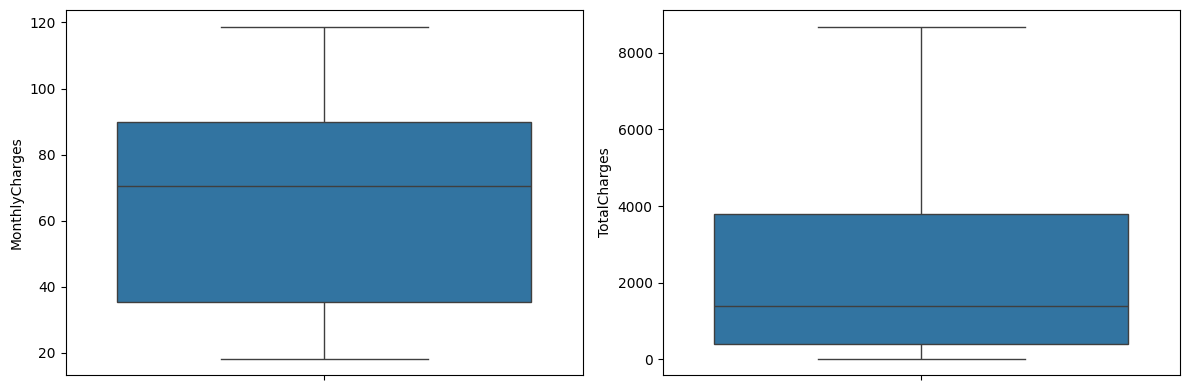

In [ ]:
# plot boxplot to analyze outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(df_clean["MonthlyCharges"], ax=ax[0])
sns.boxplot(df_clean["TotalCharges"], ax=ax[1])
plt.tight_layout()

The dataset reveals a churn rate of 26.54%, which is slightly higher than the typical telecom industry average [(usually ranging between 20% and 22%)](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/). However, without more context on the specific service type or customer demographics, we can't definitively label this rate as 'good' or 'bad'—but it does suggest room for improvement.

In [ ]:
churn_rate = df_clean['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


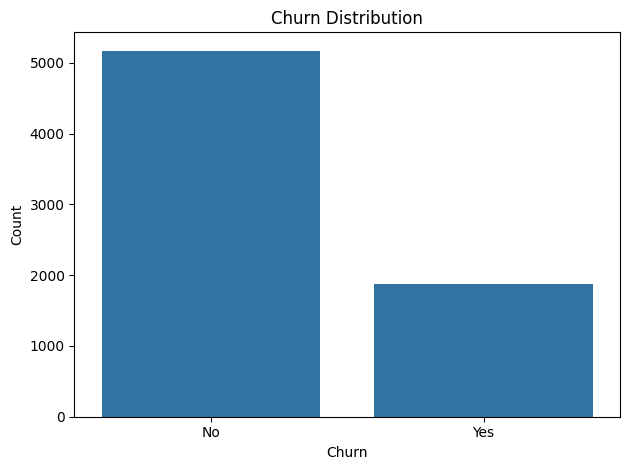

In [ ]:
sns.countplot(data=df_clean, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The data shows churn is heavily concentrated among new users—nearly half of all subscribers who leave do so within the first few months. However, retention stabilizes significantly over time: customers who stay beyond 70 months exhibit very low churn rates. This suggests that early engagement is critical, while long-term subscribers are far less likely to leave.

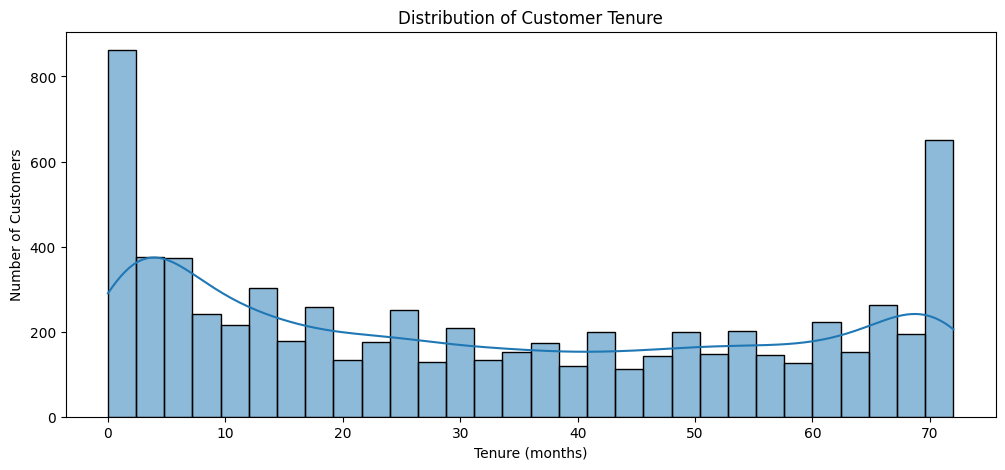

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

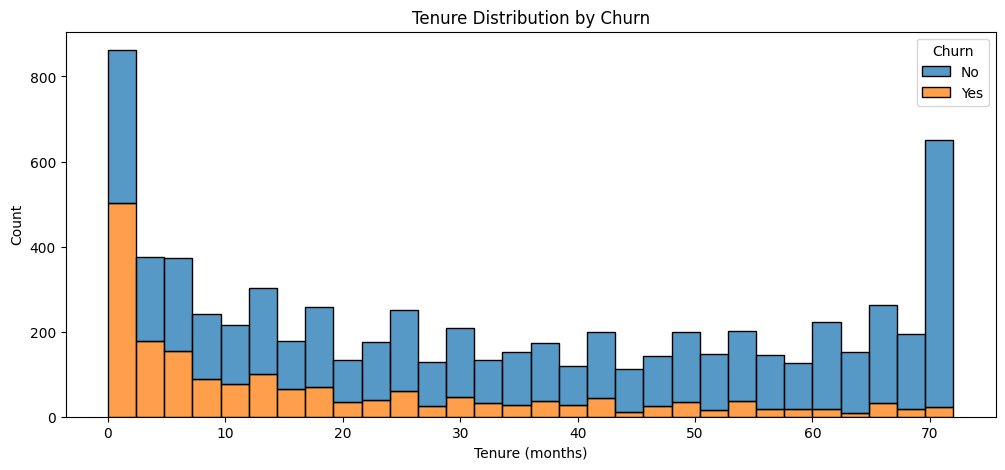

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_clean, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

Our assumption here is that churn tends to be higher in the short term and gradually drops as the customer stays longer — usually lower in the mid-term and even more so in the long run. To better explore this idea, we applied feature engineering and created a new variable to categorize tenure into three groups: short-term, mid-term, and long-term customers.

The goal was to simplify the analysis and get a clearer picture of how churn behaves over time — instead of trying to interpret what’s going on across 70 different months. This way, we can compare broader patterns and spot trends more easily.

The results we got were pretty clear:

* Short-term customers had a churn rate of 47.43%
* Mid-term customers dropped to 25.53%
* Long-term customers just 11.92%

So, there’s a sharp decline in churn as time goes on. This backs up our assumption — if a customer sticks around for over a year, there’s a good chance they’ll keep using the service. Longevity seems to build loyalty.

In [ ]:
# categorize tenure
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'Short-term'
    elif tenure <= 36:
        return 'Mid-term'
    else:
        return 'Long-term'

df_clean['tenure_group'] = df_clean['tenure'].apply(categorize_tenure)

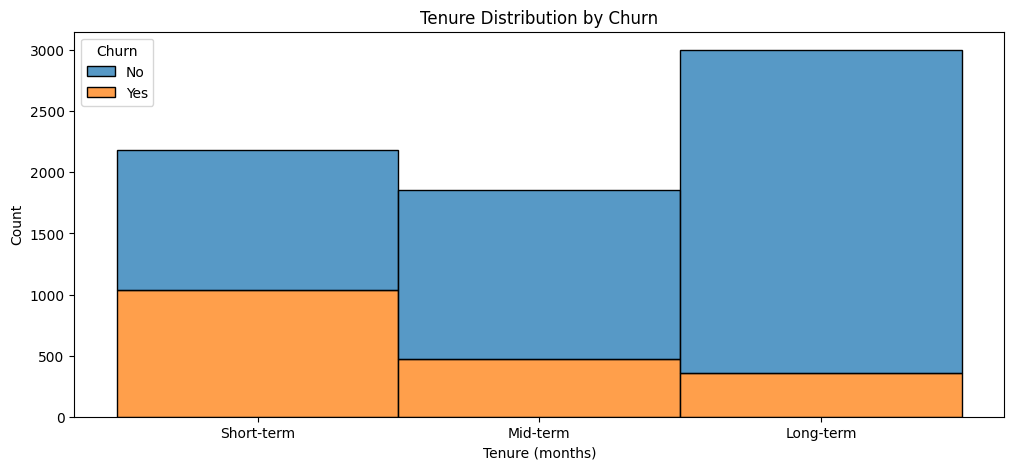

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_clean, x='tenure_group', hue='Churn', bins=30, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

In [ ]:
churn_rates_by_category = df_clean.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(churn_rates_by_category)

tenure_group
Long-term     11.929357
Mid-term      25.538793
Short-term    47.438243
Name: Churn, dtype: float64


While gender may not be a decisive factor in predicting churn for this specific problem, it’s still worth examining its distribution. Bias in datasets is a common challenge in machine learning—especially in industries like telecom, where historical data might reflect unequal customer treatment or market segmentation.

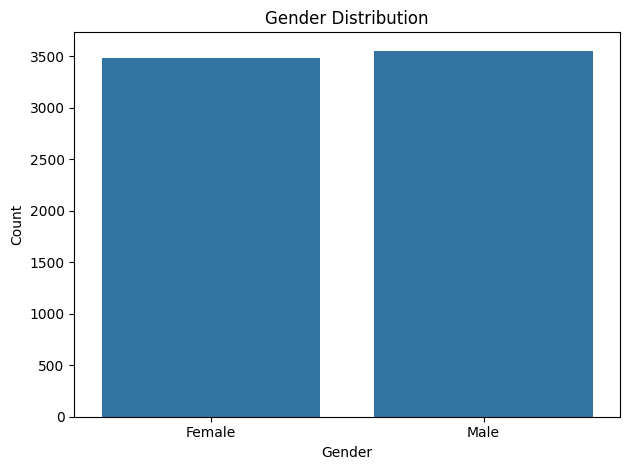

In [ ]:
sns.countplot(data=df_clean, x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## **Data Preparation** ##

At this point, we’re keeping the data prep pretty basic—just enough to get a first version of the model up and running.

We applied `LabelEncoder` to all features with only two unique values (including our target variable `Churn`), and then split the dataset into numerical and categorical variables. For the categorical ones, we went with dummy encoding so that all columns would be model-friendly later on. This sets us up for testing different algorithms without running into any compatibility issues.

In [ ]:
# data preprocessing
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# copy dataframe
df_proc = df_clean.copy()

# Label Enconding binary variables
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding for categorical columns with multiple classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# check 5 first entries
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Long-term,tenure_group_Mid-term,tenure_group_Short-term
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,False,False,True,False,False,False,True
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,True,False,False,False,False,True,False,True,False
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,False,False,False,True,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,True,False,True,False,False,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,False,False,True,False,False,False,True


As part of the data preprocessing phase, one important step we had to take was converting boolean values—those `True` and `False` entries—into integers, turning them into `1` and `0`. The reason behind this is simple: machine learning algorithms don't handle non-numeric data very well. They need numbers to make calculations, spot patterns, and build predictions.

This conversion was especially important for some of the binary features in our dataset. Even though Python sees `True` and `False` as boolean values under the hood, we needed to be explicit and make sure our dataframe only contained numerical values, especially before applying any modeling or scaling techniques.

By turning `True` into `1` and `False` into `0`, we not only made the data model-ready, but we also kept the information intact—this way, we don’t lose any meaning from the original data, we just make it digestible for the machine learning pipeline.

In [ ]:
df_proc.dtypes[df_proc.dtypes == 'bool']

,0
MultipleLines_No,bool
MultipleLines_No phone service,bool
MultipleLines_Yes,bool
InternetService_DSL,bool
InternetService_Fiber optic,bool
InternetService_No,bool
OnlineSecurity_No,bool
OnlineSecurity_No internet service,bool
OnlineSecurity_Yes,bool
OnlineBackup_No,bool


In [ ]:
# covert bool to int
bool_columns = df_proc.select_dtypes('bool').columns
df_proc[bool_columns] = df_proc[bool_columns].astype(int)

# check 5 first entries
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Long-term,tenure_group_Mid-term,tenure_group_Short-term
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
cat_var

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'tenure_group']

## **Machine Learning Model** ##

After preprocessing the data, we split it into features (X) and the target (y = Churn), then into training and test sets. We started with a baseline RandomForestClassifier, which gave a recall of 0.47—decent but improvable. To refine the model, we standardized the data and applied RandomUnderSampler to balance the classes, then tested multiple classifiers. Logistic Regression performed best, offering strong recall and interpretability.

The final Logistic Regression model achieved a recall of 0.83 for churn predictions, meaning it effectively identified customers likely to leave. While precision was lower (0.53), the high recall aligns with our goal of minimizing missed churn cases. The F1-score (0.64) and accuracy (0.75) show a solid balance between performance and reliability.

This model is now ready for real-world use, flagging at-risk customers so the company can act early. The focus on recall ensures fewer churn cases slip through, even if it means some false positives—a worthwhile tradeoff for retention strategies.

In [ ]:
# separate features from target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### **Cross Validation** ###

In [ ]:
def val_model(X, y, clf, quite=False):

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

In [ ]:
# create baseline and check performance
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.47 (+/- 0.03)


In [ ]:
# standartize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# creating instances
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgmb = LGBMClassifier()

model = []
recall = []

# evaluate performance
for clf in (rf, dt, sgdc, svc, lr, xgb, lgmb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1112, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1112, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1112, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1112, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1112, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Recall
RandomForestClassifier,0.771942
DecisionTreeClassifier,0.687050
SGDClassifier,0.743885
SVC,0.787770
LogisticRegression,0.805036
XGBClassifier,0.745324
LGBMClassifier,0.768345


In [ ]:
# train final model
final_model = make_pipeline(StandardScaler(), LogisticRegression())
final_model.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
X_test_scaler = scaler.transform(X_test)
y_pred = final_model.predict(X_test_scaler)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.53      0.83      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.78      0.73      1761
weighted avg       0.81      0.75      0.76      1761

[[922 360]
 [ 81 398]]


## **Conclusion**

Customer churn is a critical challenge in today’s competitive markets—losing a customer is far costlier than retaining one. This project aimed to predict churn before it happens, giving businesses a chance to act proactively. Using a telecom industry dataset, we analyzed customer behavior, identified key risk factors, and built a machine learning model to flag at-risk users.

The analysis revealed clear trends: short-term customers are 4x more likely to churn than long-term subscribers, and features like contract type, monthly charges, and tenure played pivotal roles. After preprocessing the data (handling missing values, encoding categories, and balancing classes), we tested multiple models. Logistic Regression outperformed others with 83% recall, prioritizing catching true churn cases—even if it meant some false alarms. The final model achieved 75% accuracy, striking a practical balance for real-world deployment.

Beyond the technical output, this project underscores a broader lesson: prevention starts with understanding. By combining exploratory analysis with interpretable ML, we turned raw data into actionable insights. Companies can now use this model to target retention efforts efficiently—saving revenue and strengthening customer relationships. In an era where every subscriber counts, that’s a win.